In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from derivative import dxdt
from scipy.integrate import solve_ivp
import lorenz_utils_edmd as lorenz
import rossler_utils_edmd as rossler
import edmd


In [2]:
a = 0.2
b = 0.2
c = 5.7
T0 = 0.001
DT = 0.001
T = 80
P_order = 2
threshold = 0.025
rossler_params =[a,b,c]
u0 = np.array([1,1,1])
Eta=250

In [3]:
time = np.array([]) #Empty time array to fill for the x-axis
x = np.array([]) #Empty array for x values
y = np.array([]) #Empty array for y values
z = np.array([]) #Empty array for z values
r = np.array([-8.0, 8.0, 27.0]) #Initial conditions array

In [4]:
t,U,UP = rossler.generate_data(u0,T0,T,DT,rossler_params)
tn,Un,UPn = rossler.generate_noisy_data(Eta,u0,T0,T,DT,rossler_params)

In [5]:
ThetaR, ThetaRd = edmd.trial_function_eval(np.transpose(U), np.transpose(UP))
A=edmd.findA(ThetaR, ThetaRd)
ThetaRn, ThetaRdn = edmd.trial_function_eval(np.transpose(Un), np.transpose(UPn))
An=edmd.findA(ThetaRn, ThetaRdn)
print(A[0:3])

[[ 0.         -1.00002449 -1.00153661  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.99999477  0.2         0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         -5.76423994  0.          0.          0.
   0.          1.00602995  0.          0.20219376]]


In [6]:
A = A[np.nonzero(A[0:3])]
print(A)
print(A.shape)

[-1.00002449 -1.00153661  0.99999477  0.2        -5.76423994  1.00602995
  0.20219376]
(7,)


In [7]:
A = A.reshape(7,1)

In [8]:
edmd_time, edmd_data = rossler.edmd_rossler_trajectory(u0,A,T0,T,DT)

[[-1.00002449]
 [-1.00153661]
 [ 0.99999477]
 [ 0.2       ]
 [-5.76423994]
 [ 1.00602995]
 [ 0.20219376]]
(7, 1)


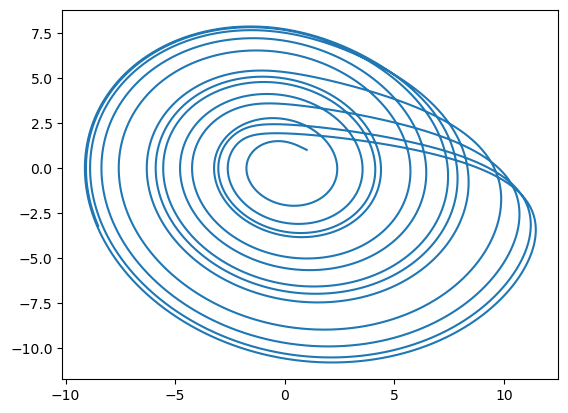

In [9]:
plt.plot(edmd_data.T[0],edmd_data.T[1])

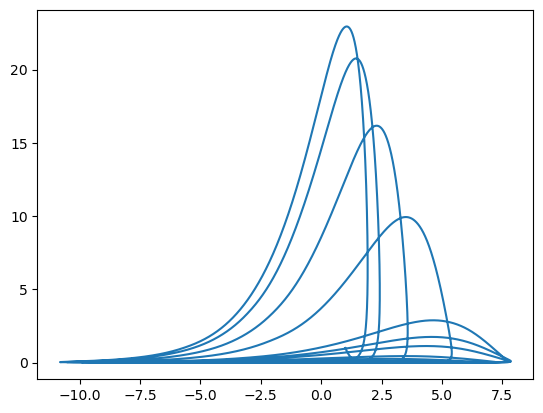

In [10]:
plt.plot(edmd_data.T[1],edmd_data.T[2])